In [1]:
# Source: https://strategicmanagementinsight.com/tools/ge-mckinsey-matrix/#:~:text=Choose%20the%20values%20between%20'1,by%20multiplying%20weights%20and%20ratings.

### Project Overview

The goal of this project is to utilize the GE McKinsey Matrix methodology to assess and visualize the strategic positioning of various products within a market. The GE McKinsey Matrix is a strategic tool used for portfolio analysis, helping businesses evaluate their product lines based on two key dimensions: market attractiveness and business strength.

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess

### Input and Assumptions

In [3]:
# Specify the path to your Excel file
file_path = './table.xlsx'  # Update with your file path

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)
# Replace NaN values with zeros in the entire DataFrame
data = data.fillna(0)
data

,produk,revenue_recurring,revenue_nonrecurring,biaya_fix,biaya_variabel,margin,market_size,market_share,industry_growth
0,A1,10000,1000000,8000,500,0.991584,1000000,0.018,0.10
1,A2,5000,100000,2000,1000,0.971429,2000000,0.018,0.02
2,A3,2000,200000,2000,2000,0.980198,3400000,0.018,0.11
3,A4,4000,300000,40000,4000,0.855263,120000,0.018,0.05
4,A5,100,400000,80,300,0.999050,1200000,0.018,0.07
5,A6,100000,5000,4000,700,0.955238,1230000,0.018,0.12
6,A7,500,20000,300,800,0.946341,12000000,0.018,0.09
7,A8,8000,300,10000,900,-0.313253,2000000,0.018,0.03


Calculates scores for each product based on market attractiveness and business strategy metrics using predefined weights.

In [4]:
# Calculate the market industry attractiveness
market_share_weight = 0.20
market_size_weight = 0.40
industry_growth_weight = 0.40

# Calculate the business strategy
revenue_recurring_weight = 0.2
revenue_nonrecurring_weight = 0.10
biaya_fix_weight = 0.2
biaya_variabel_weight = 0.1
margin_weight = 0.4

In [5]:
# Scoring
data['revenue_recurring'] = data['revenue_recurring'].rank() * revenue_recurring_weight
data['revenue_nonrecurring'] = data['revenue_nonrecurring'].rank() * revenue_nonrecurring_weight
data['biaya_fix'] = data['biaya_fix'].rank(ascending=False) * biaya_fix_weight
data['biaya_variabel'] = data['biaya_variabel'].rank(ascending=False) * biaya_variabel_weight
data['margin'] = data['margin'].rank() * margin_weight
data['market_size'] = data['market_size'].rank() * market_size_weight
data['industry_growth'] = data['industry_growth'].rank() * industry_growth_weight
data['market_share'] = data['market_share'].rank() * market_share_weight

In [6]:
N = len(data)
colors = np.random.rand(N)
area = (25 * np.random.rand(N))**2
data['colors'] = colors
data['bubble_size'] = 400 * data['market_size']
data

,produk,revenue_recurring,revenue_nonrecurring,biaya_fix,biaya_variabel,margin,market_size,market_share,industry_growth,colors,bubble_size
0,A1,1.4,0.8,0.6,0.7,2.8,0.8,0.9,2.4,0.215184,320.0
1,A2,1.0,0.4,1.1,0.3,2.0,2.2,0.9,0.4,0.800374,880.0
2,A3,0.6,0.5,1.1,0.2,2.4,2.8,0.9,2.8,0.551959,1120.0
3,A4,0.8,0.6,0.2,0.1,0.8,0.4,0.9,1.2,0.685318,160.0
4,A5,0.2,0.7,1.6,0.8,3.2,1.2,0.9,1.6,0.773846,480.0
5,A6,1.6,0.2,0.8,0.6,1.6,1.6,0.9,3.2,0.341936,640.0
6,A7,0.4,0.3,1.4,0.5,1.2,3.2,0.9,2.0,0.212294,1280.0
7,A8,1.2,0.1,0.4,0.4,0.4,2.2,0.9,0.8,0.571202,880.0


### Plot

Utilizes the calculated scores to plot a quadrant chart, where each product is represented by a bubble. The position of each bubble on the chart indicates its strategic position, with axes representing business strategy and market attractiveness.

In [7]:
def quadrant_chart(name, x, y, colors, bubble_size, xtick_labels=None, ytick_labels=None, ax=None):

    # make the data easier to work with by putting it in a dataframe
    data = pd.DataFrame({'name': name ,'x': x, 'y': y, 'Colors': colors, 'bubble_size': bubble_size})

    # let the user specify their own axes
    ax = ax if ax else plt.axes()

    # calculate averages up front to avoid repeated calculations
    y_avg = data['y'].mean()
    x_avg = data['x'].mean()

    # set x limits
    adj_x = max((data['x'].max() - x_avg), (x_avg - data['x'].min())) * 1.1
    lb_x, ub_x = (x_avg - adj_x, x_avg + adj_x)
    ax.set_xlim(lb_x, ub_x)

    # set y limits
    adj_y = max((data['y'].max() - y_avg), (y_avg - data['y'].min())) * 1.1
    lb_y, ub_y = (y_avg - adj_y, y_avg + adj_y)
    ax.set_ylim(lb_y, ub_y)

    # set x tick labels
    if xtick_labels:
        ax.set_xticks([(x_avg - adj_x / 2), (x_avg + adj_x / 2)])
        ax.set_xticklabels(xtick_labels)

    # set y tick labels
    if ytick_labels:
        ax.set_yticks([(y_avg - adj_y / 2), (y_avg + adj_y / 2)])
        ax.set_yticklabels(ytick_labels, rotation='vertical', va='center')

    # plot points and quadrant lines
    plt.style.use('ggplot')
    ax.scatter(x=data['x'], y=data['y'], c=data['Colors'], s = data['bubble_size'], alpha = 0.5, edgecolor='darkblue',
    zorder=99)
    for i, txt in enumerate(data['name']):
      ax.annotate(txt, (data['x'][i], data['y'][i]))
    ax.axvline(x_avg, c='k', lw=1)
    ax.axhline(y_avg, c='k', lw=1)

Text(0.5, 0, 'Business Strategy')

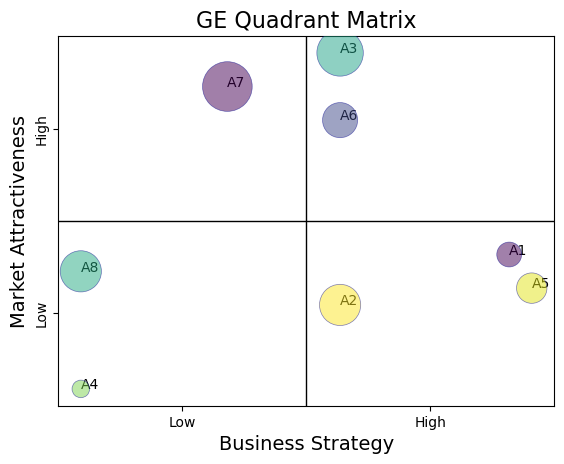

In [8]:
quadrant_chart(
    name = np.array(data['produk']),
    x=np.array(data['revenue_recurring'] + data['revenue_nonrecurring'] + data['biaya_variabel'] + data['biaya_fix'] + data['margin']),
    y=np.array(data['market_share'] + data['market_size']) + data['industry_growth'],
    colors = np.array(data['colors']),
    bubble_size = np.array(data['bubble_size']),
    xtick_labels=['Low', 'High'],
    ytick_labels=['Low', 'High']
)

plt.title('GE Quadrant Matrix', fontsize=16)
plt.ylabel('Market Attractiveness', fontsize=14)
plt.xlabel('Business Strategy', fontsize=14)

The plotted chart provides a visual representation of the strategic positioning of products within the market. Products positioned in different quadrants indicate their relative performance in terms of market attractiveness and business strategy.